In [1]:
import tams
import matplotlib.pyplot as plt
import xarray as xr

In [ ]:
#tams.data.download_examples() #This function is neccesary for getting the training datasets to test the other functions like .identify(). After use, can be commented

Downloading...
From: https://drive.google.com/uc?id=1nDWGLPzpe_nld_qbsyQcEYJ-KmMKRSqD
To: c:\Users\Mr. Lettucce\.conda\envs\py312_env\Lib\site-packages\tams\Satellite_data.nc
100%|██████████| 73.9M/73.9M [00:23<00:00, 3.20MB/s]
Downloading...
From: https://drive.google.com/uc?id=1iQEAkFp397ZYGfgBJLMZYiE9aGPqx3o-
To: c:\Users\Mr. Lettucce\.conda\envs\py312_env\Lib\site-packages\tams\MPAS_data.nc
100%|██████████| 42.5M/42.5M [00:11<00:00, 3.56MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Bb9rjyhfSgJyJTuLnwCun3XnkWUOJ248
From (redirected): https://drive.google.com/uc?id=1Bb9rjyhfSgJyJTuLnwCun3XnkWUOJ248&confirm=t&uuid=f44c99ae-1473-43ae-abf1-d692129e762f
To: c:\Users\Mr. Lettucce\.conda\envs\py312_env\Lib\site-packages\tams\MPAS_unstructured_data.nc
100%|██████████| 129M/129M [00:41<00:00, 3.14MB/s] 


In [12]:
# We are going to try make use and learn about identification of CE - using tams.identify and it's methods.

tb = tams.load_example_tb() #This function calls an example of brightness temperature. The time dim. has only one date (2006-09-01) has data for each 2 hours from 00 to 10. 
tb_sel = tb.isel(time=0) # We select the first period of time.

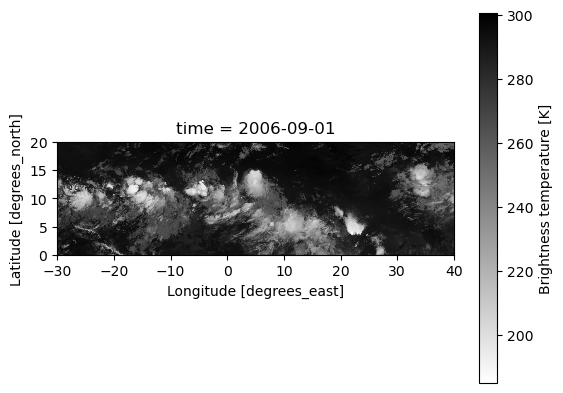

In [ ]:
# We can plot it.
tb_sel.plot(x="lon", y="lat", cmap="gist_gray_r")
ax=plt.gca()
ax.set(xlim=(-30, 40), ylim =(0, 20)) #Our Sahel region <> see tams_test for more infor.
ax.set_aspect("equal", "box")

[Text(0.5, 43.047791505856985, 'Longitude'),
 Text(91.97222222222221, 0.5, 'Latitude')]

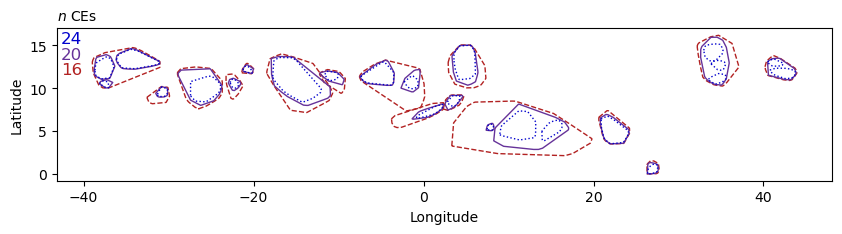

In [ ]:
# We now contour the CE (clooud elements):

fig, ax = plt.subplots(figsize=(10,3))

#This loop will tell cases where we can identify (by recognizing the value of the Tb) some systems following the values of their Tb and assigning a color and kind of line. 
for i, (thresh, color, ls) in enumerate([  
    (250, "firebrick", "--"), # Warm/ normally the cloud shield.
    (235, "rebeccapurple", "-"), # Standard by following an standard MCS definition (-38 °C)
    (225, "mediumblue", ":"),  # Cold <> normally deep convective cores (normally asociated with heaby rain)
]):
    ce = tams.identify(tb_sel, ctt_threshold=thresh, size_filter=True)[0][0] # Normal use of identify(). The last [0]s is because we want to plot the first element of the return from identify() (which is a list of CE and the second is a list of the Cores) and then extract the Df from the first list.
    # ce_ex = tams.identify(tb_sel, ctt_threshold=thresh)[0][0] # I'm doing this to see other results. After-note <> if I do this, the list index is out of range so there are no more results.
    ce_eg = tams.identify(tb_sel, ctt_threshold=thresh)[1][0] # the same applies here, no more results when reaching [1][1].
    ce.plot(ax=ax, ec=color, fc="none", ls=ls) # fc=None, makes the inside transparent.
    ax.text(0.005,0.98 - (2-i) * 0.1, len(ce), color=color, size=12, ha="left", va="top", transform=ax.transAxes) # What we're doing rn is put the text for the number of CE associated with each temperature. A very unique way to be written as for each kind of cloud, it writes in the coords specified (x,y -> 0.005 and 0.98 -... respectively) the numbers of CE of that type following the color assigned before.

ax.set_title("$n$ CEs", loc="left", size=10)
ax.set(xlabel="Longitude", ylabel="Latitude")

# In this case, the ctt is used to detect the edges of the cloud by defining a Tb for that matter. This also means we can use ctt_core_threshold to identify cores = raining clouds
# On the other hand, the argument size_filter is always set True by default, fitering the 235 with not enough 219 area. See the next cell for a new example of this parameter. Disabling this option makes TAMS less eficient.
 

[Text(0.5, 29.700209329880593, 'Longitude'),
 Text(91.97222222222221, 0.5, 'Latitude')]

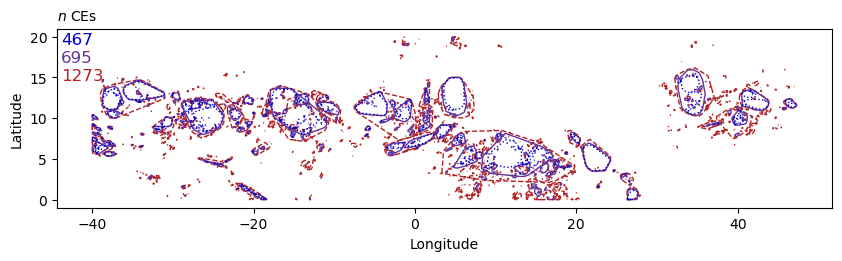

In [29]:
# We now contour the CE (clooud elements):

fig, ax = plt.subplots(figsize=(10,3))

for i, (thresh, color, ls) in enumerate([  
    (250, "firebrick", "--"), # Warm/ normally the cloud shield.
    (235, "rebeccapurple", "-"), # Standard by following an standard MCS definition (-38 °C)
    (225, "mediumblue", ":"),  # Cold <> normally deep convective cores (normally asociated with heaby rain)
]):
    ce = tams.identify(tb_sel, ctt_threshold=thresh, size_filter=False)[0][0] # <=== Set to false
    ce_eg = tams.identify(tb_sel, ctt_threshold=thresh)[1][0] 
    ce.plot(ax=ax, ec=color, fc="none", ls=ls) 
    ax.text(0.005,0.98 - (2-i) * 0.1, len(ce), color=color, size=12, ha="left", va="top", transform=ax.transAxes) 

ax.set_title("$n$ CEs", loc="left", size=10)
ax.set(xlabel="Longitude", ylabel="Latitude")


In [23]:
ce

,geometry,area_km2,inds219,area219_km2,cs219
0,"POLYGON ((42.60609 11.10857, 43.23793 11.14124...",32786.623730,"[2, 3, 4]",21691.998810,"MULTIPOLYGON (((43.11648 11.39076, 43.32919 11..."
1,"POLYGON ((41.28456 12.55428, 41.98751 12.58555...",12511.147524,[5],7503.878890,"MULTIPOLYGON (((41.29154 12.58308, 41.33639 12..."
2,"POLYGON ((34.99721 12.0833, 35.07298 12.08492,...",16914.353538,"[11, 14, 15]",10481.803392,"MULTIPOLYGON (((35.00023 12.09986, 35.07576 12..."
3,"POLYGON ((34.35286 10.46461, 34.89777 10.61553...",20487.666072,"[10, 12, 13, 16, 17]",11076.608043,"MULTIPOLYGON (((35.26395 11.24077, 35.30297 11..."
4,"POLYGON ((34.03559 13.15382, 34.07299 13.15475...",43282.772256,"[18, 19, 20, 21]",34538.430605,"MULTIPOLYGON (((34.13808 14.58714, 34.17664 14..."
5,"POLYGON ((26.36748 0, 26.83371 0, 27.39871 0.1...",12655.043947,[22],8989.069746,"MULTIPOLYGON (((26.59017 0.02994, 26.78338 0.0..."
6,"POLYGON ((22.11289 3.50929, 23.46891 3.6424, 2...",87768.566969,[25],76664.942309,"MULTIPOLYGON (((22.08261 3.51624, 22.1131 3.51..."
7,"POLYGON ((14.20119 3.84827, 15.94145 4.86631, ...",42929.617226,"[31, 32, 33, 35, 36]",24236.939936,"MULTIPOLYGON (((16.02669 5.74587, 16.04421 5.7..."
8,"POLYGON ((11.30586 3.94468, 11.36176 3.95188, ...",130062.008546,"[41, 42, 43, 44, 45, 46, 47, 48]",84176.353997,"MULTIPOLYGON (((12.59443 5.3197, 12.68022 5.37..."
9,"POLYGON ((7.89206 5.07654, 7.91959 5.07947, 8....",5421.684270,[50],4463.425728,"MULTIPOLYGON (((7.86502 5.10828, 7.89252 5.108..."


In [24]:
ce_eg

,geometry,area_km2
0,"POLYGON ((46.45179 11.43426, 46.90813 11.48031...",2861.636356
1,"POLYGON ((46.41562 12.01331, 46.46724 12.02231...",1005.761023
2,"POLYGON ((43.11648 11.39076, 43.32919 11.52867...",376.874022
3,"POLYGON ((43.18207 11.2876, 43.22879 11.29522,...",21270.230923
4,"POLYGON ((41.55725 11.6926, 41.57923 11.6967, ...",44.893865
...,...,...
228,"POLYGON ((-39.21806 8.05716, -39.21202 8.07164...",162.820770
229,"POLYGON ((-39.6356 9.90075, -39.55546 9.91233,...",778.493929
230,"POLYGON ((-39.69147 9.0216, -39.6514 9.02775, ...",35.831705
231,"POLYGON ((-39.76212 7.26577, -39.65283 7.33096...",720.343379


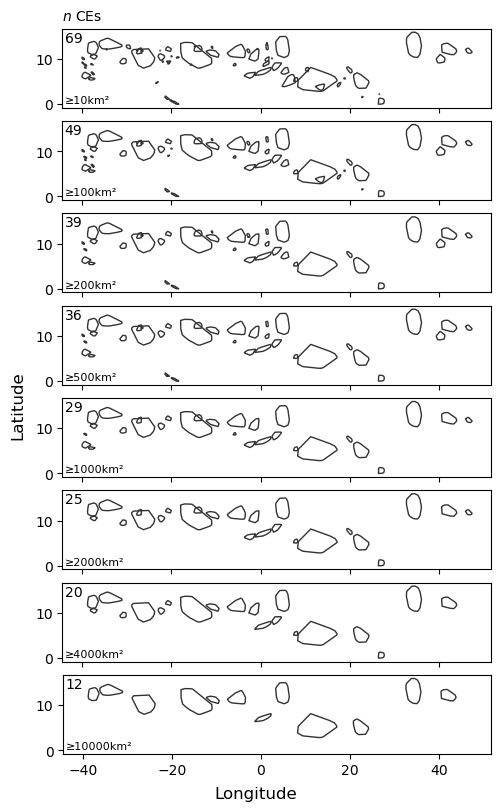

In [ ]:
# Finally we can make a size filtering threshold

cases = [10, 100, 200, 500, 1000, 2000, 4000, 10_000] # Assign the size thresholds

fig, axs = plt.subplots(len(cases), 1, sharex=True, sharey=True, figsize=(5, 8), constrained_layout=True)
# plt.subplots(creates 8 rows and 1 column for subplots ,[sharex=True, sharey=True] means the maps are linked together (when we zoom in one, so will the others),
# figsize=(5, 8), constrained_layout=True ==> makes the plot not overlapping labels.)

for ax, thresh in zip(axs.flat, cases): #zip is useful when we want to treat a set of data with some values as one pair of items such as (map, threshold) so each ax is a map and each thresh is the size we stablished before.
    ce = tams.identify(tb, size_threshold=thresh)[0][0]
    ce.plot(ax=ax, ec="0.2", fc="none")
    ax.text(0.005, 0.97, f"{len(ce)}", size=10, ha="left", va="top", transform=ax.transAxes)
    ax.text(0.005, 0.03, f"≥{thresh}km²", size=8, ha="left", va="bottom", transform=ax.transAxes)

axs[0].set_title("$n$ CEs", loc="left", size=10)
fig.supxlabel("Longitude")
fig.supylabel("Latitude")